# Data Visualization for $I_{3322}$ Breaking Channels

This notebook analyzes and plots data produced by the following scripts:
* script/I_3322-breaking_depolarizing.py
* script/I_3322-breaking_amplitude_damping.py

In [6]:
from context import QNetOptimizer as QNopt
import matplotlib.pyplot as plt
from pennylane import numpy as np
import json

from os import listdir
from os.path import isfile, join
import re

In [2]:
def analyze_data_files(data_files):
    data_dicts = []
    for filepath in data_files:
        with open(filepath) as file:
            data_dicts.append(json.load(file))
    
    results = {}
    noise_params = []
    for data_dict in data_dicts:
        for i in range(len(data_dict["noise_params"])):
            if np.isnan(data_dict["max_scores"][i]):
                continue
            
            noise_key = "{:.2f}".format(data_dict["noise_params"][i])
            
            if noise_key in results:
                results[noise_key].append(data_dict["max_scores"][i])
            else:
                results[noise_key] = [data_dict["max_scores"][i]]
                noise_params.append(np.round(data_dict["noise_params"][i],5))
    
    sorted_noise_params = np.sort(noise_params)
    max_scores = [
        max(results["{:.2f}".format(noise_param)])
        for noise_param in sorted_noise_params
    ]
    mean_scores = [
        np.mean(results["{:.2f}".format(noise_param)], axis=0)
        for noise_param in sorted_noise_params
    ]
    std_errs = [
        np.std(results[noise_key], axis=0) / np.sqrt(len(results[noise_key]))
        for noise_key in ["{:.2f}".format(noise_param) for noise_param in sorted_noise_params]
    ]
    
    
    return sorted_noise_params, max_scores, mean_scores, std_errs          

## Depolarizing Channel

In [3]:
max_entangled_dep_path = "../../script/data/I_3322-breaking_depolarizing/max_entangled/"
max_entangled_dep_files = [
    join(max_entangled_dep_path, f) for f in listdir(max_entangled_dep_path) if (
        f.endswith(".json") and isfile(join(max_entangled_dep_path, f))
    )
]
print("num max entangled files : ", len(max_entangled_dep_files))

arb_dep_path = "../../script/data/I_3322-breaking_depolarizing/arbitrary/"
arb_dep_files = [
    join(arb_dep_path, f) for f in listdir(arb_dep_path) if (
        f.endswith(".json") and isfile(join(arb_dep_path, f))
    )
]
print("num arbitrary files : ", len(arb_dep_files))

num max entangled files :  7
num arbitrary files :  7


## Amplitude Damping Channel

In [4]:
max_entangled_amp_path = "../../script/data/I_3322-breaking_amplitude_damping/max_entangled/"
max_entangled_amp_files = [
    join(max_entangled_amp_path, f) for f in listdir(max_entangled_amp_path) if (
        f.endswith(".json") and isfile(join(max_entangled_amp_path, f))
    )
]
print("num max entangled files : ", len(max_entangled_amp_files))

arb_amp_path = "../../script/data/I_3322-breaking_amplitude_damping/arbitrary/"
arb_amp_files = [
    join(arb_amp_path, f) for f in listdir(arb_amp_path) if (
        f.endswith(".json") and isfile(join(arb_amp_path, f))
    )
]
print("num arbitrary files : ", len(arb_amp_files))

num max entangled files :  13
num arbitrary files :  13


## Plots

amplitude damping breaking threshold is >0.5
noise parameter :  0.5
score :  0.009099313959606115


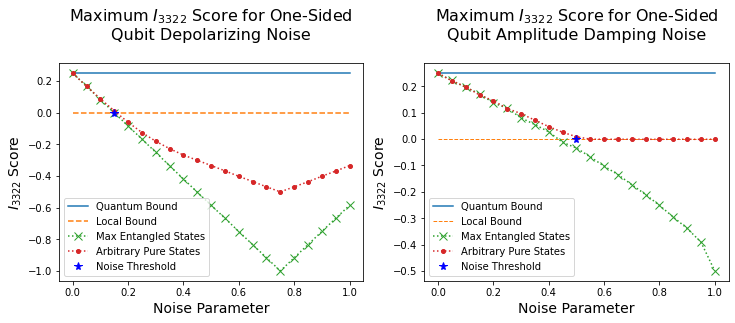

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

# Depolarizing
ent_noise_params_dep, ent_max_scores_dep, ent_mean_scores_dep, ent_std_errs_dep = analyze_data_files(max_entangled_dep_files)
arb_noise_params_dep, arb_max_scores_dep, arb_mean_scores_dep, arb_std_errs_dep = analyze_data_files(arb_dep_files)

ax1.plot(ent_noise_params_dep, [0.25]*len(ent_noise_params_dep), label="Quantum Bound")
ax1.plot(ent_noise_params_dep, [0]*len(ent_noise_params_dep), "--", label="Local Bound")
ax1.plot(ent_noise_params_dep, ent_max_scores_dep, ":x", markersize=8, label="Max Entangled States")
ax1.plot(arb_noise_params_dep, arb_max_scores_dep, ":.", markersize=8, label="Arbitrary Pure States")

ax1.plot([0.15], [0], "b*", markersize=8, label="Noise Threshold")
ax1.set_title(r"Maximum $I_{3322}$ Score for One-Sided" + "\nQubit Depolarizing Noise\n", size=16)
ax1.set_ylabel(r"$I_{3322}$ Score", size=14)
ax1.set_xlabel("Noise Parameter", size=14)
ax1.legend()

# Amplitude Damping
ent_noise_params_amp, ent_max_scores_amp, ent_mean_scores_amp, ent_std_errs_amp = analyze_data_files(max_entangled_amp_files)
arb_noise_params_amp, arb_max_scores_amp, arb_mean_scores_amp, arb_std_errs_amp = analyze_data_files(arb_amp_files)

ax2.plot(ent_noise_params_amp, [0.25]*len(ent_noise_params_amp), label="Quantum Bound")
ax2.plot(ent_noise_params_amp, [0]*len(ent_noise_params_amp), "--", linewidth=1, label="Local Bound")
ax2.plot(ent_noise_params_amp, ent_max_scores_amp, ":x", markersize=8, label="Max Entangled States")
ax2.plot(arb_noise_params_amp, arb_max_scores_amp, ":.", markersize=8, label="Arbitrary Pure States")

ax2.plot([0.5], [0], "b*", markersize=8, label="Noise Threshold")
ax2.set_title(r"Maximum $I_{3322}$ Score for One-Sided" + "\nQubit Amplitude Damping Noise\n", size=16)
ax2.set_ylabel(r"$I_{3322}$ Score", size=14)
ax2.set_xlabel("Noise Parameter", size=14)
ax2.legend()

print("amplitude damping breaking threshold is >0.5")
print("noise parameter : ", ent_noise_params_amp[10])
print("score : ",arb_max_scores_amp[10])

plt.show()